# Key Factors Influencing Subscriptions to Term Deposits

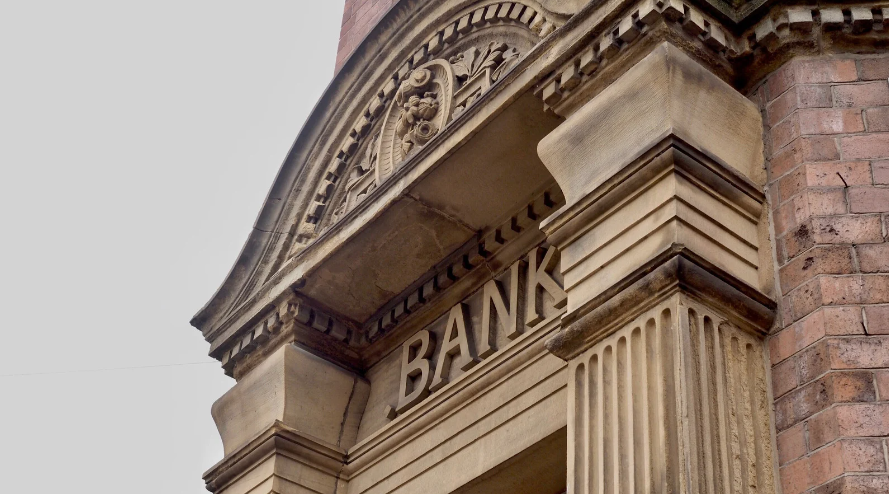

Based on data received from Rocket Mortgage.

##############################################################################################################################

# Read Me!

### NOTE: Kindly open In Jupyter Notebook to See Images. (Images won't be visible in Google colab)

Welcome to my solution for this technical assessment. I've broken this notebook into a few sections as according to the assignment. I've done this to simulate how I would actually go through the data and problem if I was working for Rocket Mortgage (Which I really do look forward to!). 

The sections are as follows:

#### 1) Data Cleaning and Integrity Checks: 


Throughout this section I made sure to do integrity checks to ensure future data streams would be consistent and devoid of any issues. 

I also looked at data type and missing value issues to be able to prime it for the EDA section.

[Go to Data Cleaning and Integrity Checks](#1-data-cleaning-and-integrity-checks)


#### 2) Trend Analysis: 

Before answering any questions, I believe getting a feel of the data is of utmost importance. This section explores some of my initial findings and questions I would ask myself. As someone who loves understanding 'the flow' behind data, I found a few trends and recommendations that I thought would be helpful!

Over here I used tableau to visualize my exploration. This section is split into 12 exploration parts.

[Go to Trend Analysis](#2-EDA)

#### 3) A Deeper Dive with Machine Learning:

[Go to the Machine Learning Section!](#3-ML)

#### 4) Key Findings and Insights.

[Go to the Key Findings and Insights Section](#4-KF)

#### 5) Actionable Recommendations!

[Go to the Actionable Recommendations Section](#5-AR)

#### 6) Presentation Information

[Go to Presentation Information](#6-PPT)

#### 7) Appendix

[Go to the appendix](#7-Appendix)


###### Note: Relevant Tableau dashboards are labeled based on the numbering/hierarchy in the Trend Analysis Section

#### Install Packages and Import Data

In [1]:
%%capture 

# Capture basically helps us remove the output in the printed cells below.

!pip install pandas
!pip install jupysql
!pip install matplotlib
!pip install click
!pip install seaborn
!pip install statsmodels
!pip install sklearn
!pip install xgboost
!pip install scipy  

In [2]:
%%capture

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

##########################################################################################################################

<a id="1-data-cleaning-and-integrity-checks"></a>

# 1) Data Cleaning and Integrity Checks: 

## Data Dictionary

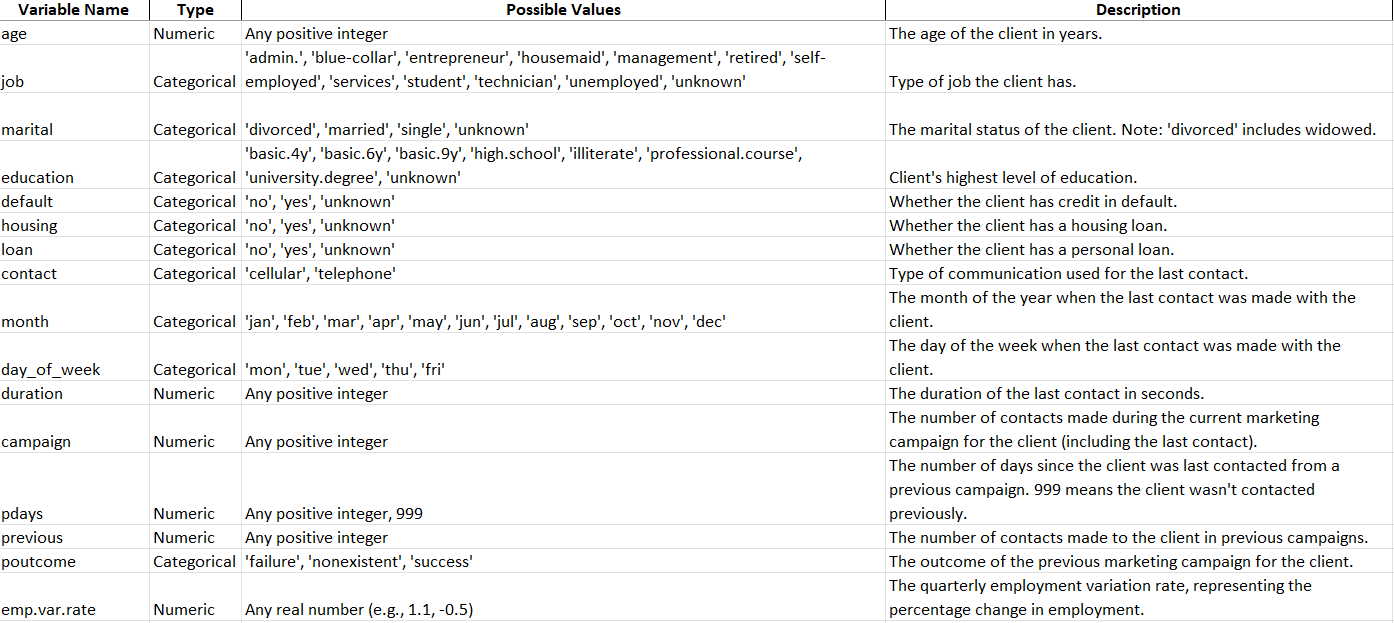

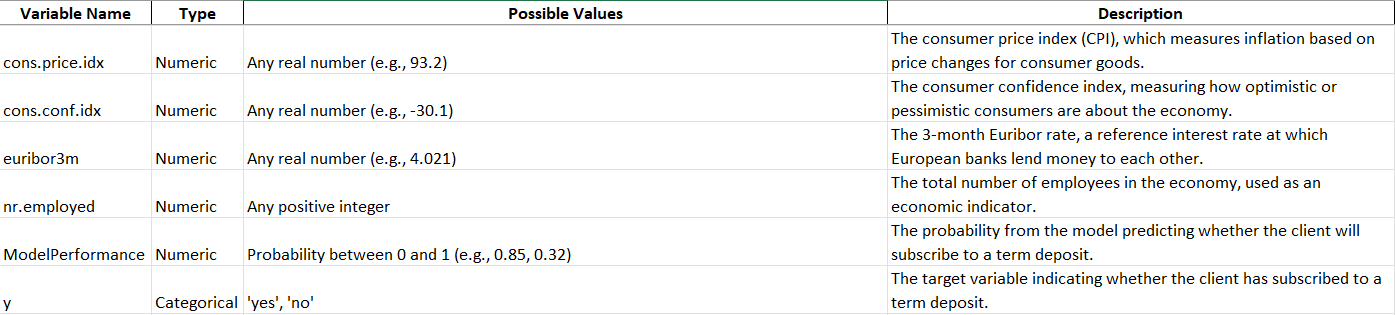

#### Assumptions and Points:

1) There is a slight error in the description of the data. Even when 'previous' = 1 the 'pdays' can equal to 999. Basically even though theyve been contacted before, 'pdays' saying 999 means they havent been contacted with a prior campaign. We are ignoring that for now.

2) Employment Variation Rate (emp.var.rate): Positive suggests job market expansion and potential economic growth. Negative indicates a contracting job market, often signaling economic slowdown.

3) Consumer Price Index (cons.price.idx) Rising Values reflect inflation, may decrease consumer purchasing power. Falling Values indicate deflation, can lead to reduced economic activity.

4) Consumer Confidence Index (cons.conf.idx): Higher Values showw consumer optimism, typically leads to increased spending. Lower Values show consumer pessimism, likely results in decreased spending.

5) Euribor 3 Month Rate (euribor3m): Higher Rates suggests expectations of higher central bank rates, reflecting stronger economic activity. Lower Rates indicate lower borrowing costs, often due to central bank measures to stimulate the economy.

6) ModelPerformance: The models prediction of how probable the user is to subscribe. (Not very accurate after looking at the data!)


#### Key Metrics:

1) 'y': Whether or not the contact subscribes to the bank term deposit.

2) 'duration': Duration of the call can be a metric to analyze. We need to explore its effect on 'y'



In [3]:
df = pd.read_csv('BankDataset.csv')

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27181,40,blue-collar,divorced,basic.9y,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.949273,yes
27182,36,entrepreneur,divorced,high.school,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.944940,no
27183,37,blue-collar,married,basic.6y,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.947082,no
27184,32,admin.,single,university.degree,no,yes,yes,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.925211,no


## A) Checking for data type inconsistencies and missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27186 entries, 0 to 27185
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              27186 non-null  int64  
 1   job              27186 non-null  object 
 2   marital          27186 non-null  object 
 3   education        27186 non-null  object 
 4   default          27186 non-null  object 
 5   housing          27186 non-null  object 
 6   loan             27186 non-null  object 
 7   contact          27186 non-null  object 
 8   month            27186 non-null  object 
 9   day_of_week      27186 non-null  object 
 10  duration         27186 non-null  int64  
 11  campaign         27186 non-null  int64  
 12  pdays            27186 non-null  int64  
 13  previous         27186 non-null  int64  
 14  poutcome         27186 non-null  object 
 15  emp.var.rate     27186 non-null  float64
 16  cons.price.idx   27186 non-null  float64
 17  cons.conf.id

There seems to be no missing values.

In [6]:
df[['y']].value_counts()

# Just checking for class distribution
# This is an imbalanced class set. Can try oversampling later during model building.

y  
no     25868
yes     1318
Name: count, dtype: int64

In [7]:
df = df.dropna()
#No missing values but just in case lets keep this here for the pipeline.

##### As we can see:

1) We need to convert 'age' into a numerical data type

2) We can convert the output variable as the following: 1 for 'Yes' and 0 for 'No'

In [8]:
# For point number 1:

df = df.copy()  
df['age'] = pd.to_numeric(df['age'], errors='coerce').fillna(0).astype(int)

# For point number 2:

df = df.copy()  
df['y'] = df['y'].replace({'yes': 1, 'no': 0}).astype(int)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27186 entries, 0 to 27185
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              27186 non-null  int32  
 1   job              27186 non-null  object 
 2   marital          27186 non-null  object 
 3   education        27186 non-null  object 
 4   default          27186 non-null  object 
 5   housing          27186 non-null  object 
 6   loan             27186 non-null  object 
 7   contact          27186 non-null  object 
 8   month            27186 non-null  object 
 9   day_of_week      27186 non-null  object 
 10  duration         27186 non-null  int64  
 11  campaign         27186 non-null  int64  
 12  pdays            27186 non-null  int64  
 13  previous         27186 non-null  int64  
 14  poutcome         27186 non-null  object 
 15  emp.var.rate     27186 non-null  float64
 16  cons.price.idx   27186 non-null  float64
 17  cons.conf.id

We also see no null values

## B) Checking for data type inconsistencies and missing values.

In [10]:
# We'll first find the categorical columns and then identify the unique values in each.

categorical_columns = df.select_dtypes(include=['object']).columns

In [11]:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [12]:
unique_values = {}

# Now we have the categories let us find the unique values in each

for col in categorical_columns:
    unique_values[col] = df[col].unique()

for col, values in unique_values.items():
    print(f"Feature is: {col}")
    print(f"Unique Values are: {values}\n")


Feature is: job
Unique Values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Feature is: marital
Unique Values are: ['married' 'single' 'divorced' 'unknown']

Feature is: education
Unique Values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Feature is: default
Unique Values are: ['no' 'unknown' 'yes']

Feature is: housing
Unique Values are: ['no' 'yes' 'unknown']

Feature is: loan
Unique Values are: ['no' 'yes' 'unknown']

Feature is: contact
Unique Values are: ['telephone' 'cellular']

Feature is: month
Unique Values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov']

Feature is: day_of_week
Unique Values are: ['mon' 'tue' 'wed' 'thu' 'fri']

Feature is: poutcome
Unique Values are: ['nonexistent' 'failure' 'success']



#### This not only helps us understand the data present in each categories but also helps us identify any errors/data entry or spelling mistakes.

#### As seen there are no issues.


## C) Checking for Logical Consistency

In [13]:
"""Over here let us just check for logical consistency. Here we check for logical consistencies for age, 
   call durations and campaign counts.
"""

if not (df['age'] > 0).all():
    print("Some clients have invalid ages (less than or equal to 0)")

if not (df['duration'] >= 0).all():
    print("Some call durations are negative")

if not (df['campaign'] >= 0).all():
    print("Some campaign contact counts are negative")


Let us look at the data

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
count,27186.000000,27186.000000,27186.000000,27186.000000,27186.000000,27186.000000,27186.000000,27186.000000,27186.000000,27186.000000,27186.000000,27186.000000
mean,40.127087,253.082469,2.803208,997.865629,0.023063,1.138380,93.854731,-39.413823,4.832107,5213.717156,0.953934,0.048481
std,9.178447,262.122960,3.169778,33.574352,0.150352,0.470313,0.384445,3.004400,0.258456,17.565933,0.013030,0.214784
min,18.000000,0.000000,1.000000,0.000000,0.000000,-0.100000,93.200000,-42.700000,4.021000,5191.000000,0.875232,0.000000
25%,33.000000,99.000000,1.000000,999.000000,0.000000,1.100000,93.444000,-42.000000,4.857000,5191.000000,0.945999,0.000000
50%,39.000000,171.000000,2.000000,999.000000,0.000000,1.400000,93.918000,-41.800000,4.959000,5228.100000,0.955645,0.000000
75%,47.000000,307.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.963000,5228.100000,0.963458,0.000000
max,61.000000,4918.000000,56.000000,999.000000,2.000000,1.400000,94.465000,-36.100000,5.045000,5228.100000,0.988360,1.000000


Here we can analyze information and get some quick statistical information on our dataset.

In [15]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27181,40,blue-collar,divorced,basic.9y,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.949273,1
27182,36,entrepreneur,divorced,high.school,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.944940,0
27183,37,blue-collar,married,basic.6y,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.947082,0
27184,32,admin.,single,university.degree,no,yes,yes,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.925211,0


Now that the data is in the right format and complete. Let us do some EDA before moving onto machine learning to figure out the root cause.

## E) Additional ways to address issues for future data.

Maintaining data integrity is all about ensuring our data is accurate, reliable, and secure. One key factor is access control—only authorized people should be able to view or edit sensitive data to prevent mistakes. Regular audits are also crucial; they help catch any errors or inconsistencies early, so you can fix them before they cause bigger problems. There have been times in my experience that just looking at the data streams from time to time can help identify issues that I/the system might not have seen before.

It's also important to have strong data validation processes in place to make sure the data entering your system is correct and fits expected formats. Backups are your safety nets. Rgularly backing up your data ensures you can recover it if something goes wrong. Also make sure to encrypt the data too.

We can ensure data integrity by checking off these boxes.

##########################################################################################################################

<a id="2-EDA"></a>

# 2) Trend Analysis: 

### Let us export this data. Let us create some Tableau worksheets and a Tableau Dashboard for EDA and answer some preliminary questions.

In [16]:
df.to_excel('cleaned_bank_data.xlsx', index=False)


Based on the key metrics identified let us explore the data and see what might matter the most to the data's client. These are questions that piqued my interest while getting familiar with the data.


## Running a Correlation Heatmap

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27186 entries, 0 to 27185
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              27186 non-null  int32  
 1   job              27186 non-null  object 
 2   marital          27186 non-null  object 
 3   education        27186 non-null  object 
 4   default          27186 non-null  object 
 5   housing          27186 non-null  object 
 6   loan             27186 non-null  object 
 7   contact          27186 non-null  object 
 8   month            27186 non-null  object 
 9   day_of_week      27186 non-null  object 
 10  duration         27186 non-null  int64  
 11  campaign         27186 non-null  int64  
 12  pdays            27186 non-null  int64  
 13  previous         27186 non-null  int64  
 14  poutcome         27186 non-null  object 
 15  emp.var.rate     27186 non-null  float64
 16  cons.price.idx   27186 non-null  float64
 17  cons.conf.id

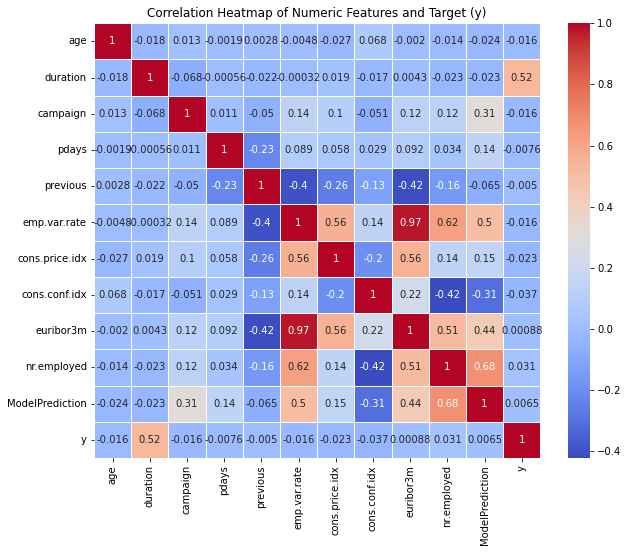

In [18]:
numeric_df = df.select_dtypes(include=['float64', 'int32','int64'])
numeric_df['y'] = df['y']
correlation_matrix = numeric_df.corr()

# Above we're trying to select the numeric columns

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features and Target (y)')
plt.show()


##### Potential multicolliniarity detected. 'emp.var.rate' and 'euribor3m' are highly dependent on each other. We can look at removing this after doing our EDA.


As we can see here:

1) There is high correlation between the duration of the call and the outcome. (We have to remember that 0 for duration strongly predicts 'y'). Might have to dive deeper.

2) 'euribor3m' and 'emp.var.rate' are highly correlated. This could be due to their mutual dependence on broader economic trends and central bank policies.

3) Can see how the model prediction for the existing model does not influence y much/ not correlated.

4) 'emp.var.rate' and 'cons.price.idx' show a strong positive correlation of 0.56: Suggests rising employment variation rates are linked to increasing consumer prices, reflecting inflationary trends in a growing economy.

5) Positive correlation of 0.51 between 'nr.employed' and 'euribor3m': Demonstrates that increases in employment levels are associated with higher short-term interest rates, possibly due to central bank policies in response to economic growth.

6) Negative correlation between 'emp.var.rate' and 'previous' (-0.42): Higher employment variation rates are associated with fewer prior contacts, suggesting better conversion rates in stronger economies.

7) High Correlation between 'nr.employed' and 'Model Prediction' (0.68).

### Note: The Worksheets are labeled EQ1-EQ12 in the Tableau file attached. I've also bucketed the questions into different groups (Demographics,  Education & Financial, etc).

##  A) Demographics

### 1) How does the client’s age relate to their likelihood of subscribing to a term deposit?


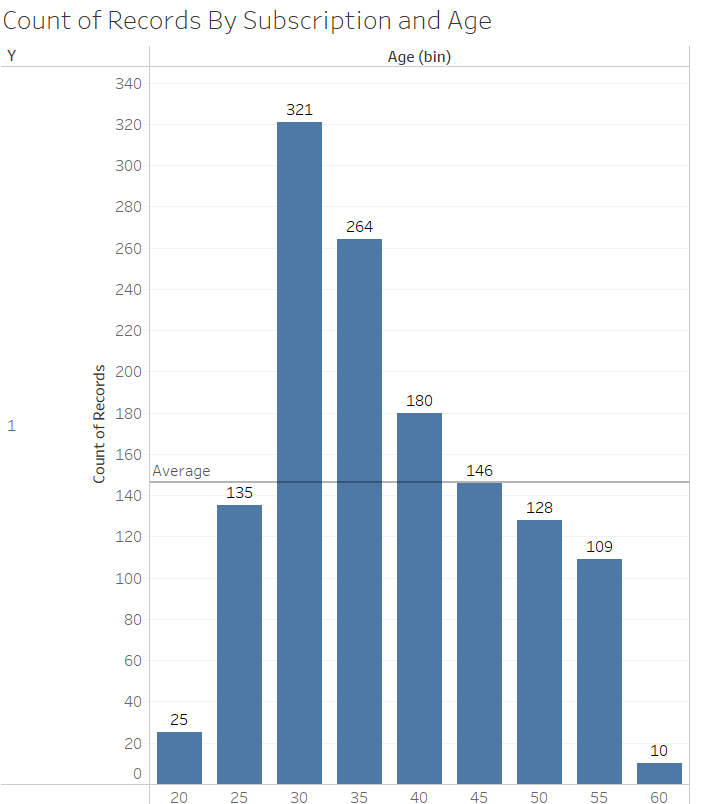

When we group in buckets of 5 we can see that the average number of subscriptions peaks around 30-35 years old with a steady decline post that. 

The ranges from 30-45 are above the average for these records.

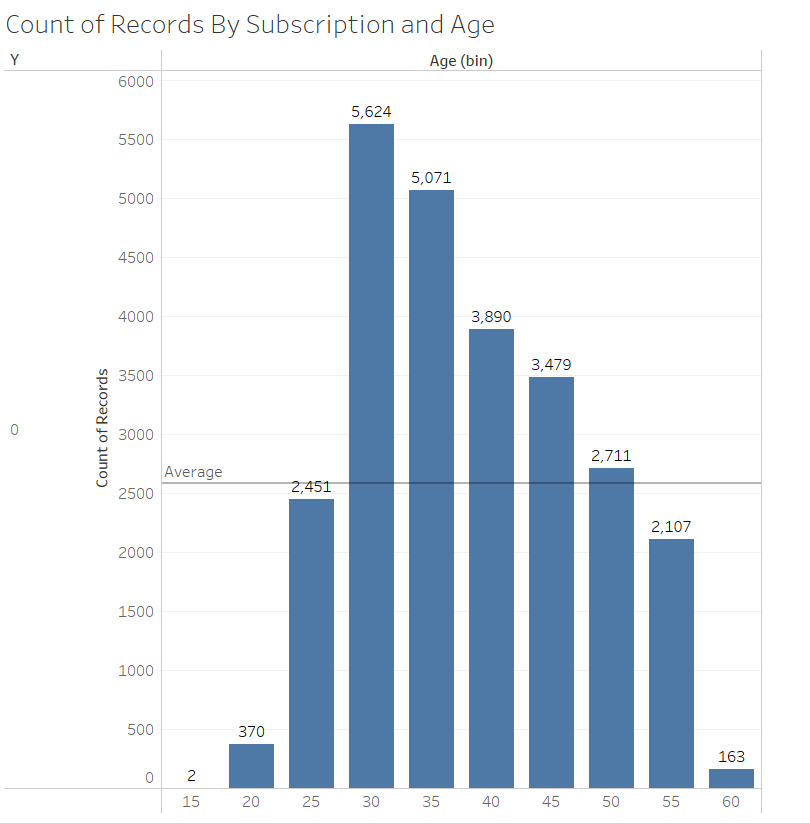

We also see that the distribution of people not subscribing is also similar. This can indicate that the customerbase of the client itself is distributed in the above fashion. Let us look at percentages for a different perspective.

The ranges from 30-55 are above the average for these records.

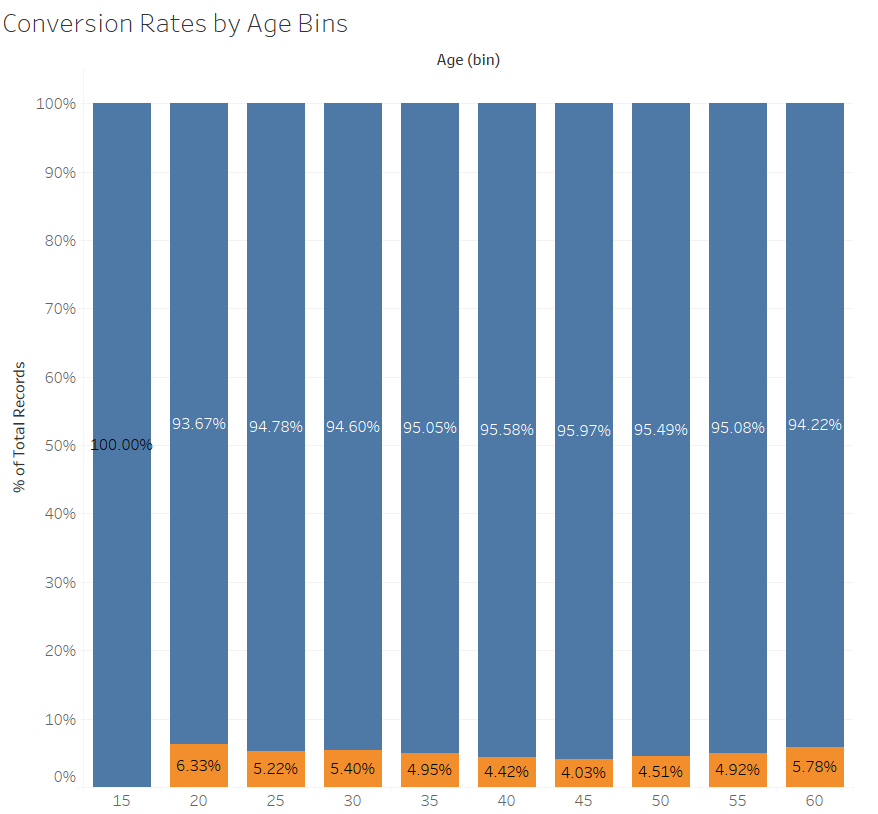

As we can see from above the conversion rates see a decline from 35 years old onwards.

Although the conversion rates are decrease slightly the absolute number of subscriptions is still higher.

The most important customer segment in terms of age seems to lie between 30-35 year olds, followed by 35-45 year olds.

### 2) What jobs have the highest/lowest subscriptions for term deposits?

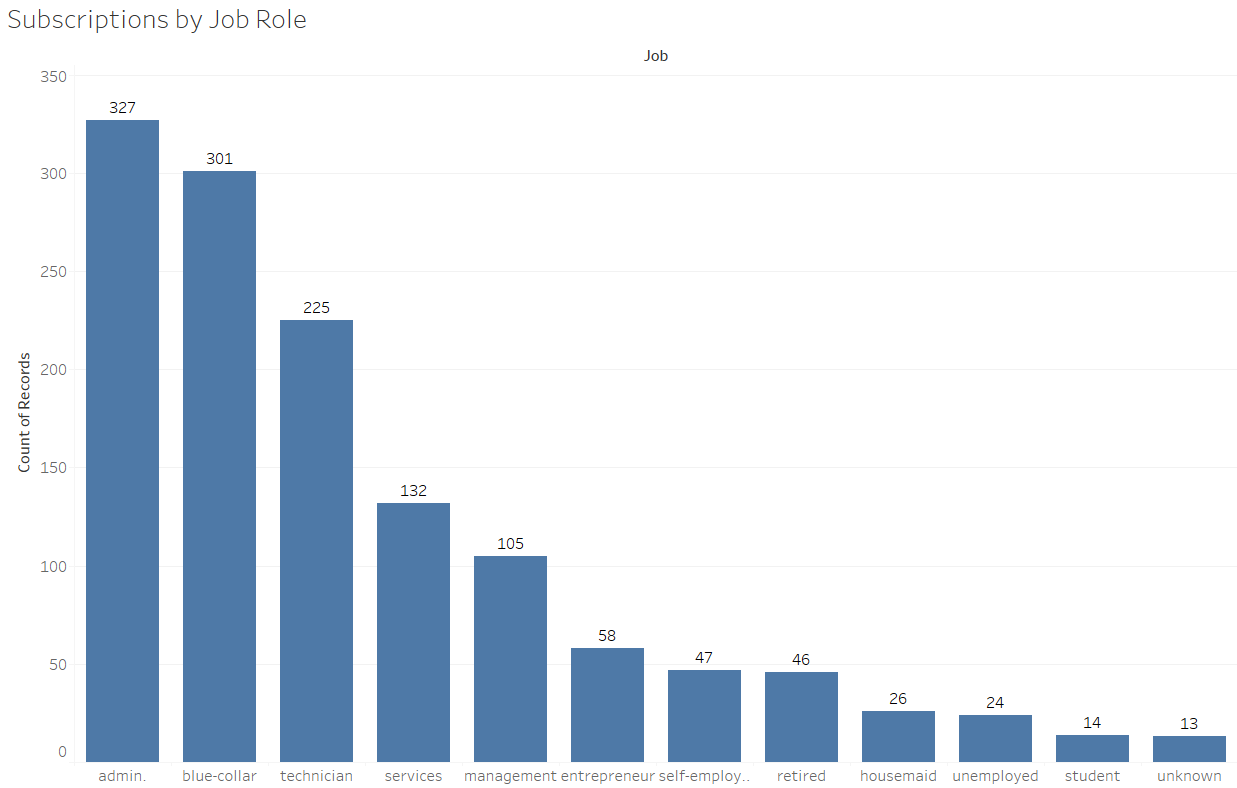

When we look at job roles Admin and blue-collar jobs lead in subscriptions, with 327 and 301 respectively.
Technicians (225) and services (132) follow, while roles like management (105) and entrepreneur (58) have fewer subscriptions.


This could mean that Admin and blue-collar workers may show higher engagement or interest due to financial stability or targeted marketing.

It also possibly indicates that people with less disposable income such as students or unemployed people are not able to subscribe to fixed deposits. (These deposits tend to be long term commitments of relatively larger amounts).

### 3) How does marital status affect subscriptions?

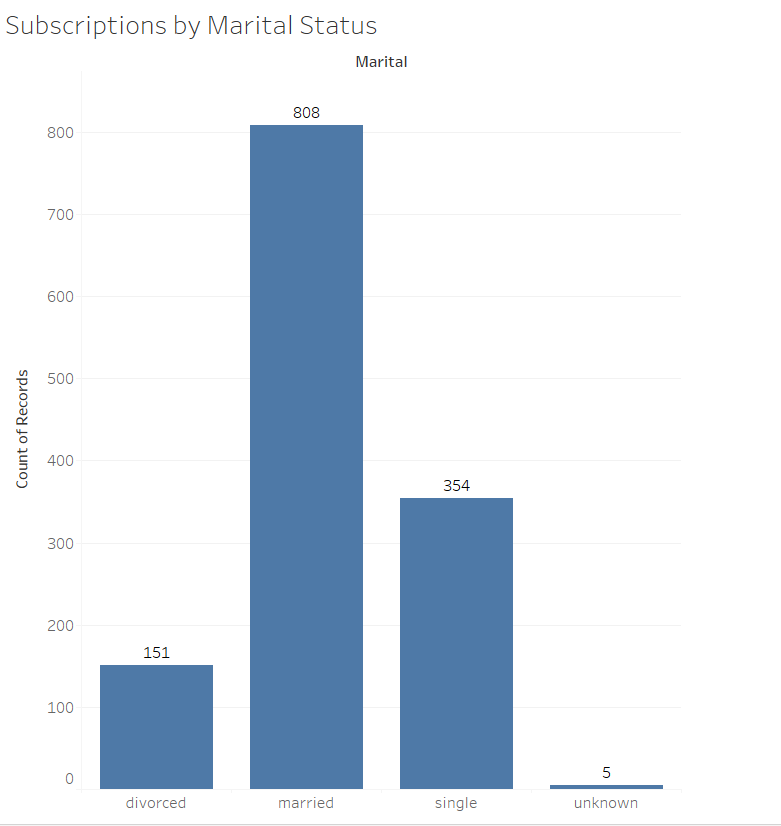

As we can see the married group has the highest number of subscriptions, with over 808 records. Single individuals follow with around 354 subscriptions, while divorced has fewer, around 151.

It could mean that Married individuals may show higher engagement, possibly due to financial stability or marketing focus.
The divorced and unknown groups show significantly lower subscriptions, suggesting potential areas for targeted efforts. 

It could also mean that the groups themselves arent large enough in the target market. We'd have to do a deeper dive into market dynamics for this.

Additional information on percentages can be found in EQ 3.5 (Make sure to not consider the 'unknown' category as the number of records are too less to draw a solid conclusion)

## B) Education and Financial

### 4) Does the level of education influence the likelihood of subscribing to a deposit?

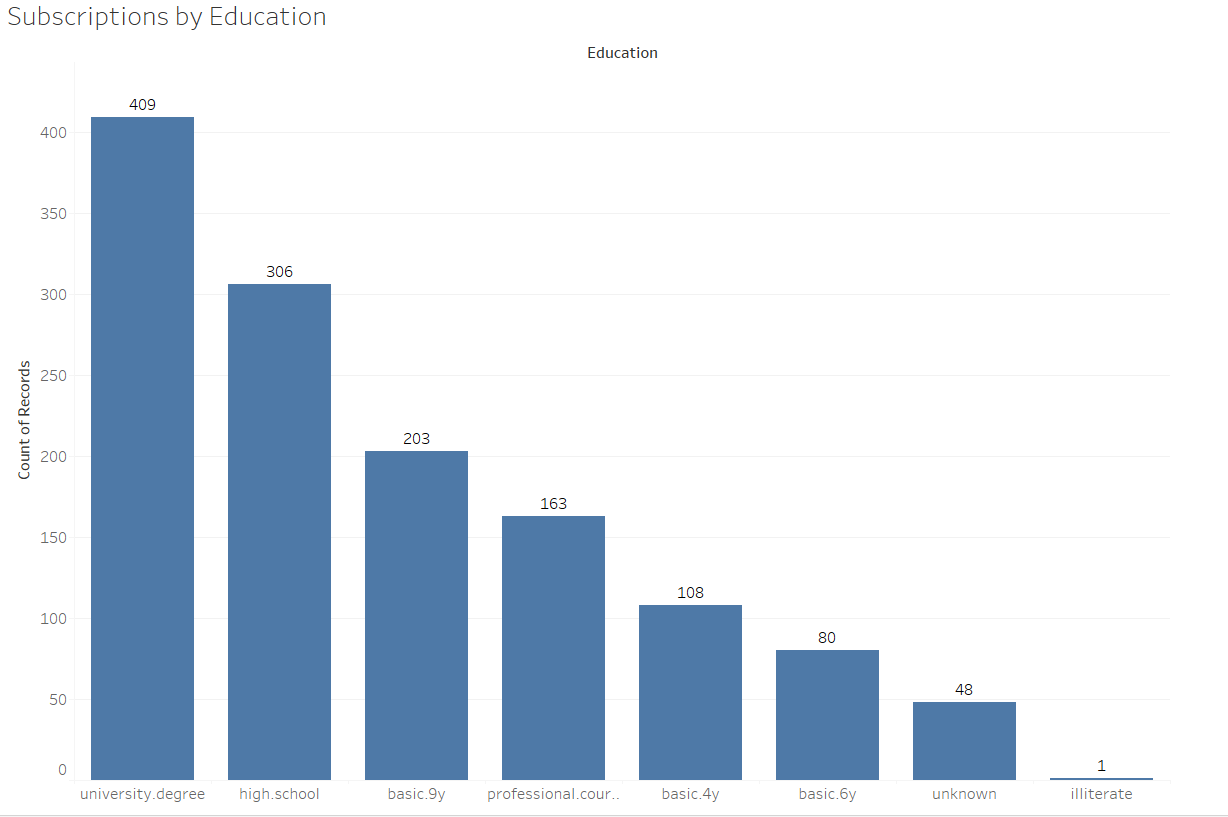

The highest number of subscriptions comes from individuals with a university degree (409) and high school education (306). Basic education (9 years) and professional courses also contribute significantly, while illiterate individuals have the lowest subscriptions.

Higher education levels (university degree and high school) correlate with more subscriptions, possibly due to greater financial literacy or income. Lower subscription rates among those with basic or unknown education levels may indicate less engagement or need for targeted marketing.

Additional information on percentages and conversion rates can be found in EQ 4.5 (Remember again the values may be skewed due to the lack of sufficient records for each bucket)

### 5) How do housing loan and personal loan statuses affect the likelihood of subscription?

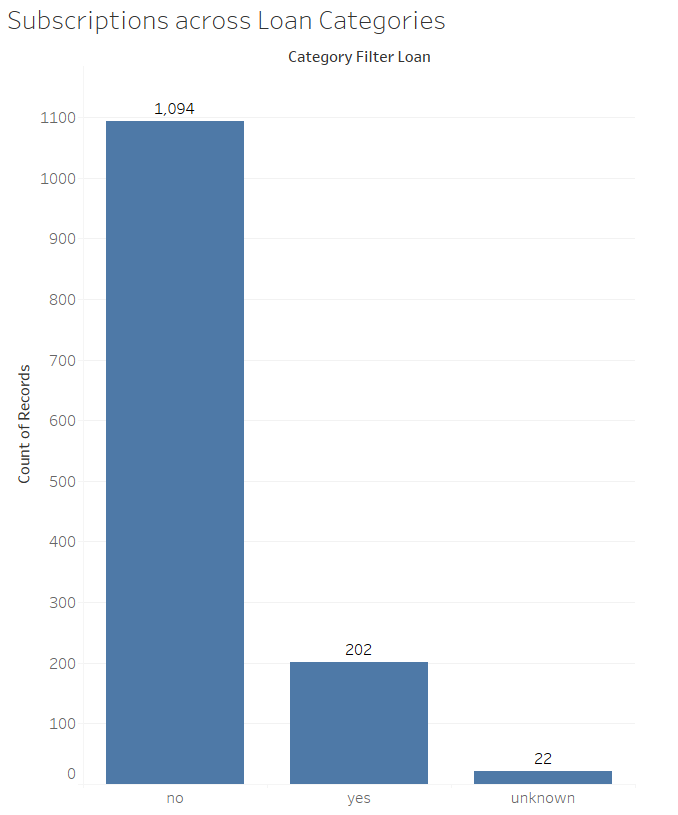

As we can see individuals without personal loans have the highest number of subscriptions, significantly more than those with loans.

This could mean people without existing personal loans may be more willing to subscribe, possibly due to fewer financial obligations or better liquidity.

Let us also look at housing loans

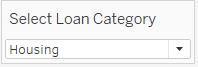

This parameter can be changed here in the dashboard!

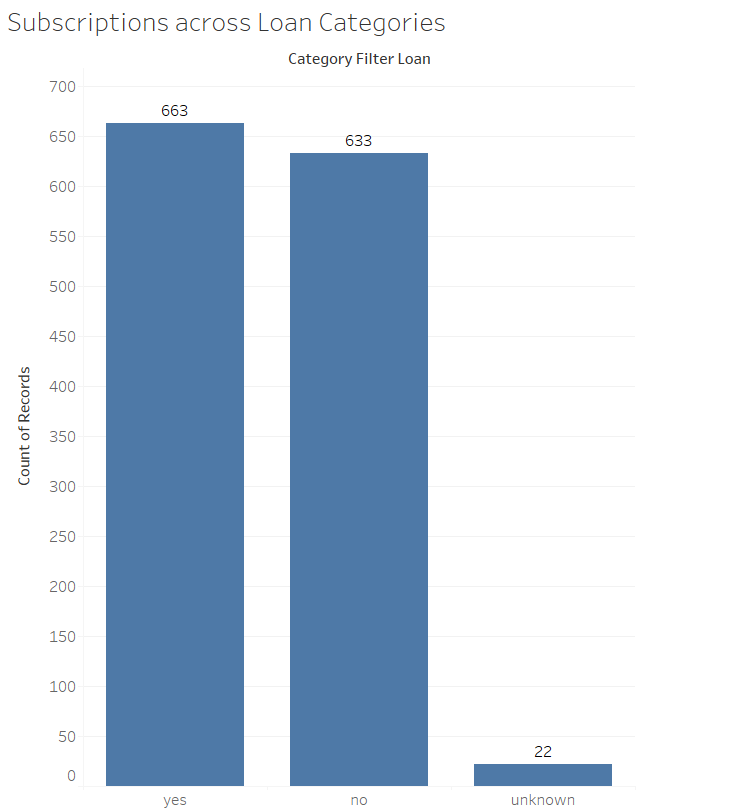

The trend seems different when considering housing loans. As we can see the number of subscriptions is almost evenly split between those with loans and those without, both around 650 records.

Having a housing loan does not seem to be a major factor in subscription decisions, as both groups show similar levels of engagement. However our ML model might tell us otherwise

## C) Communication

### 6) Which contact type (telephone or cellular) is more effective for driving subscriptions?

This question could help us ascertain potential future marketing strategies.

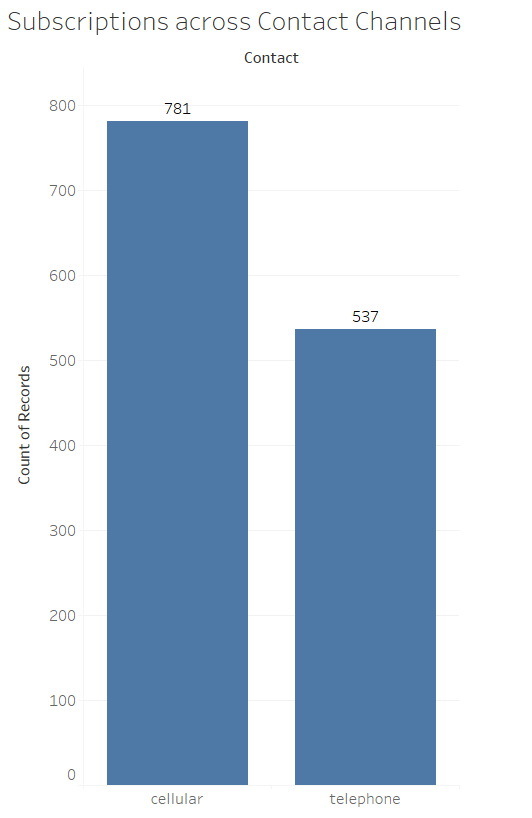

Cellular contact has more subscriptions (781) compared to telephone contact (537).

This could mean using cellular as a contact method might be more effective for reaching clients and securing subscriptions than using traditional telephone lines.

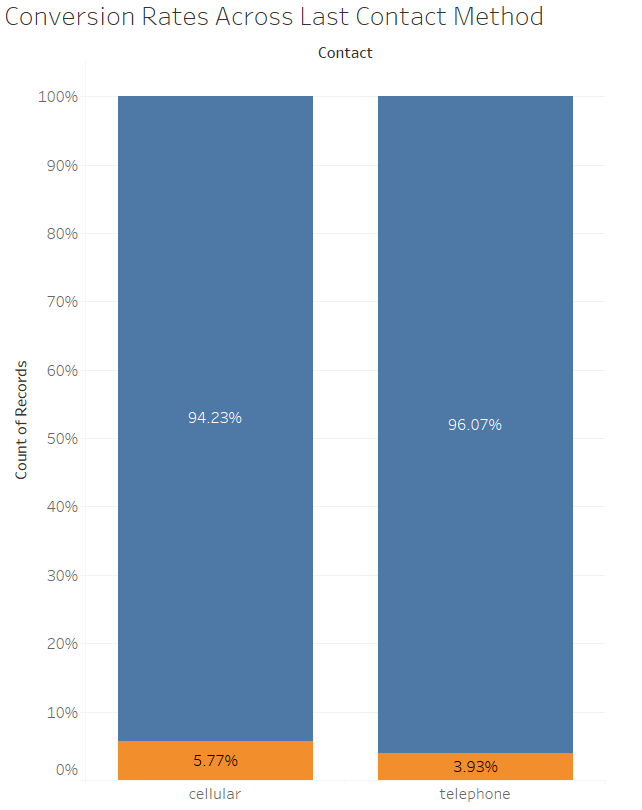

As we can see the conversion rate is higher too!

### 7) Does the duration of a call correlate with a higher probability of subscription?

This is important as we could potentially look into increasing conversions by finding drivers that long conversations possess.

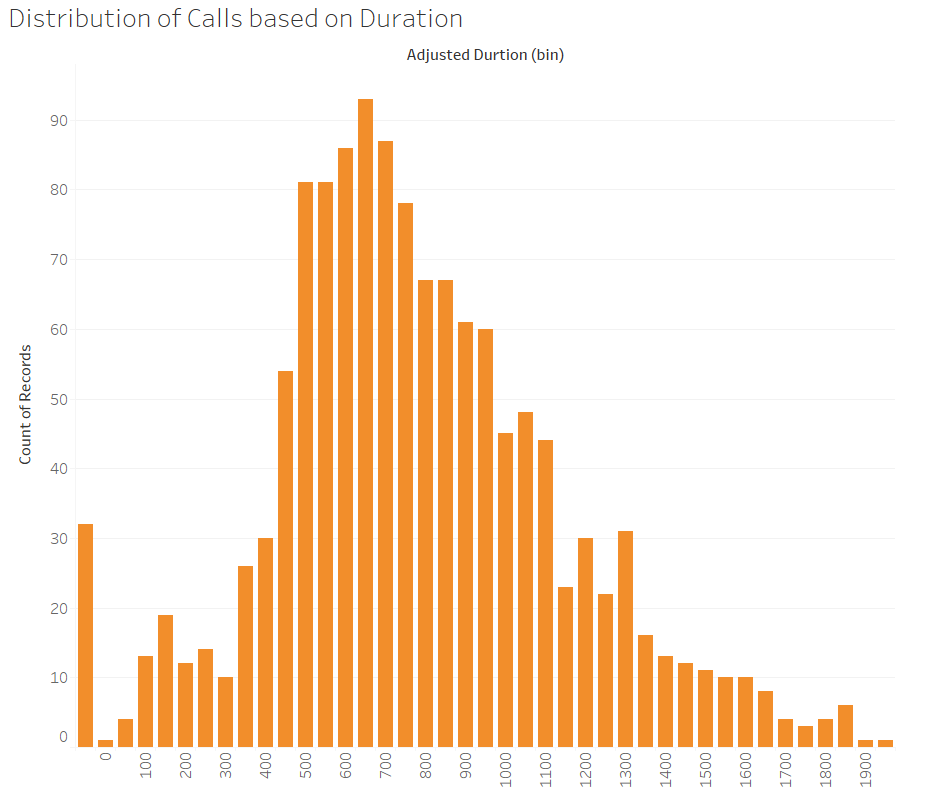

This is one of the more obvious interpretations. As we can see most calls have durations between 400 to 900 seconds, with the highest frequency around 600 seconds.

This suggests that moderate-length calls may be most common for ideal customer engagement and for conversions. Calls beyond 15 minutes become increasingly rare. (Are outliers we treat later).

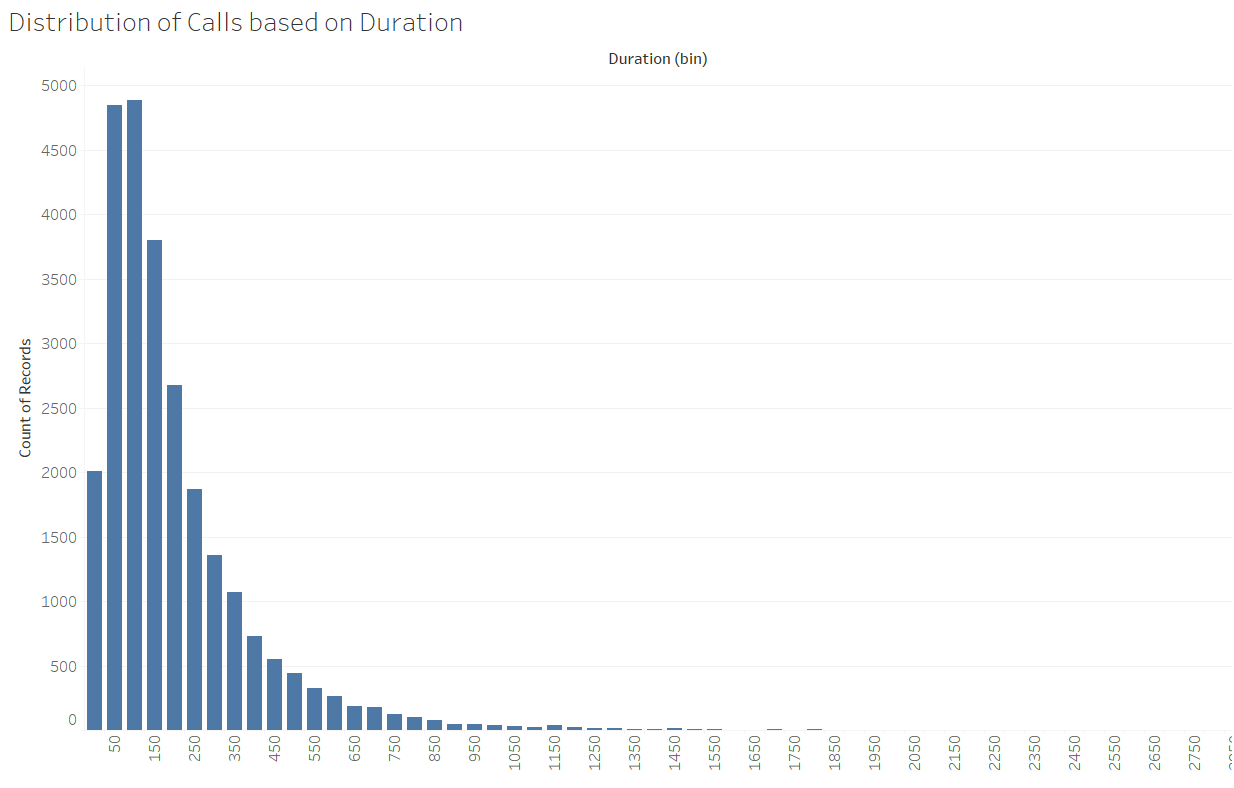

What is also interesting to note is that the count of records are to the lower side of the duration for those that don't convert. This intuitively can mean that people who talk longer are much more likely to subscribe. (This was mentioned in the data dictionary too).

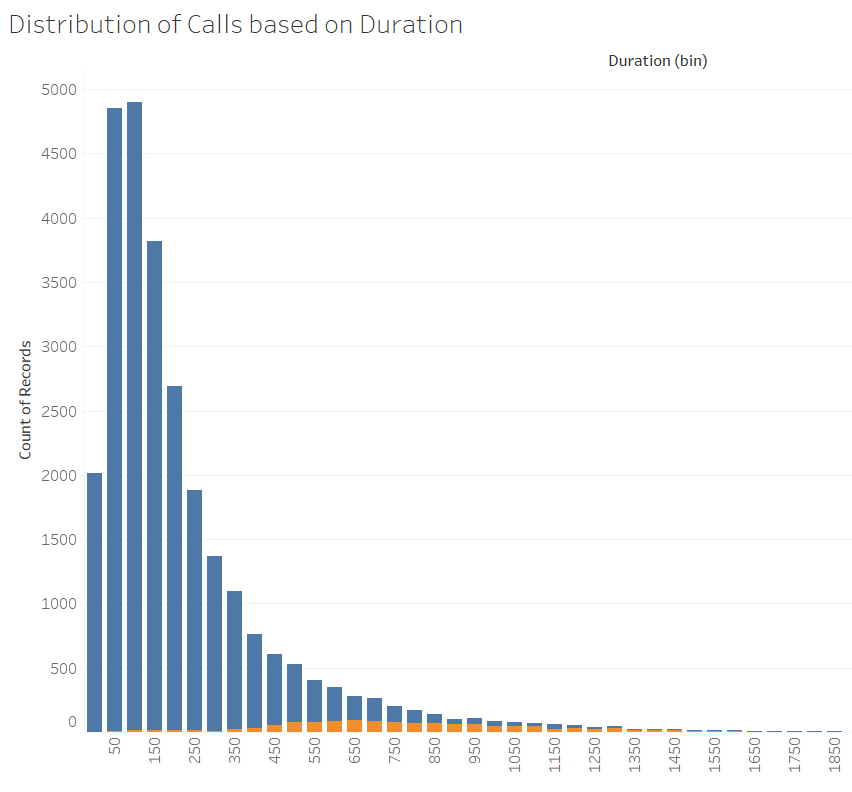

A quick side by side comparision attests to my statement.

## D) Factors Related to Time

### 8) Which months or days of the week have the highest subscriptions?

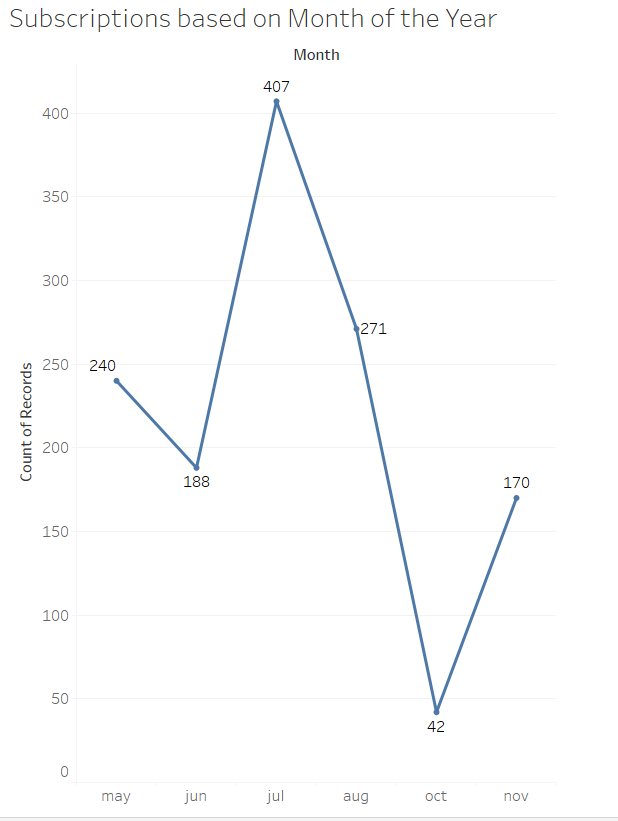

As we can see July shows the highest number of subscriptions (407), while October has the lowest (42). There is a sharp drop after August.

This could mean that the summer months, especially July, seem to be the most effective for subscriptions, while October experiences a significant decline, possibly indicating seasonal trends.

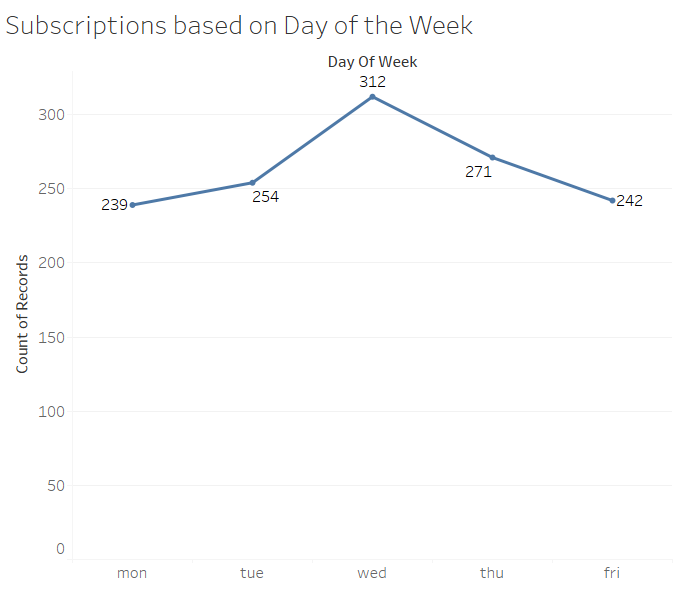

The highest number of subscriptions occurs on Wednesday, with 312 records, while the numbers decline towards Friday.

This means Mid-week, particularly Wednesday, seems to be the most effective day for securing subscriptions, while the effectiveness drops as the week progresses toward Friday.

We can potentially look at the month and day combined trend too by adding the dimension to the column shelf!

## E) Influence of Previous Campaigns

### 9) How does the conversion rate for subscriptions look like based on the past success/failures.

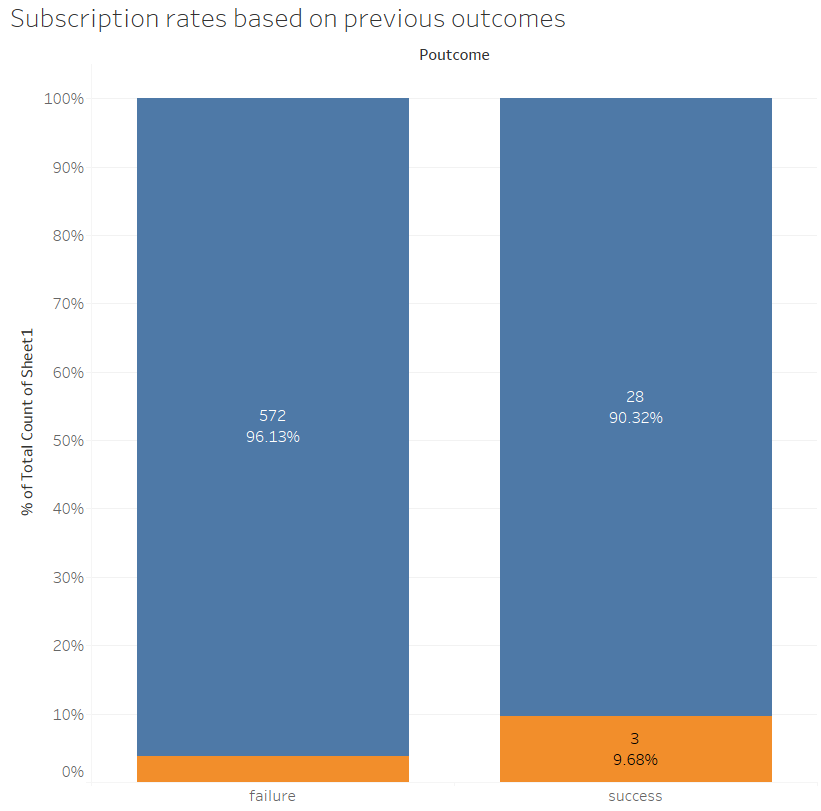

3.87% of the customers with a previous outcome of failure subscribes, while 9.68% with a successful previous outcome subscribed.

A previous successful outcome slightly increases the chances of a subscription.

Although we see a higher subscription to a term deposit for the campaigns which have been previously successful the number of datapoints are few to make a conclusive decision. 

## F) Client Behaviours

### 10) Economic Metrics Based on subscriptions (Yes vs No)

In [19]:
# List of columns to include
columns_to_include = ['emp.var.rate', 'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']

grouped_averages = df.groupby('y')[columns_to_include].mean()
grouped_averages = grouped_averages.reset_index()

# Basically we're grouping by the target variable and getting the averages.

In [20]:
# Let us create a tidy DataFrame with field names, averages, and grouped by 'y'
avg_df = pd.melt(grouped_averages, id_vars=['y'], var_name='Field Name', value_name='Average Value')

print(avg_df)

   y      Field Name  Average Value
0  0    emp.var.rate       1.140127
1  1    emp.var.rate       1.104097
2  0   cons.conf.idx     -39.388859
3  1   cons.conf.idx     -39.903794
4  0  cons.price.idx      93.856706
5  1  cons.price.idx      93.815968
6  0       euribor3m       4.832055
7  1       euribor3m       4.833115
8  0     nr.employed    5213.593258
9  1     nr.employed    5216.148862


We see that the values do not differ too much. We did not take median because the values are already limited in number for these economic metrics. We can use our model further on to see if these metrics play a role in the subscriptions or not!

## G) Others

### 11) What does the distribution of our number of contacts look like for this campaign?

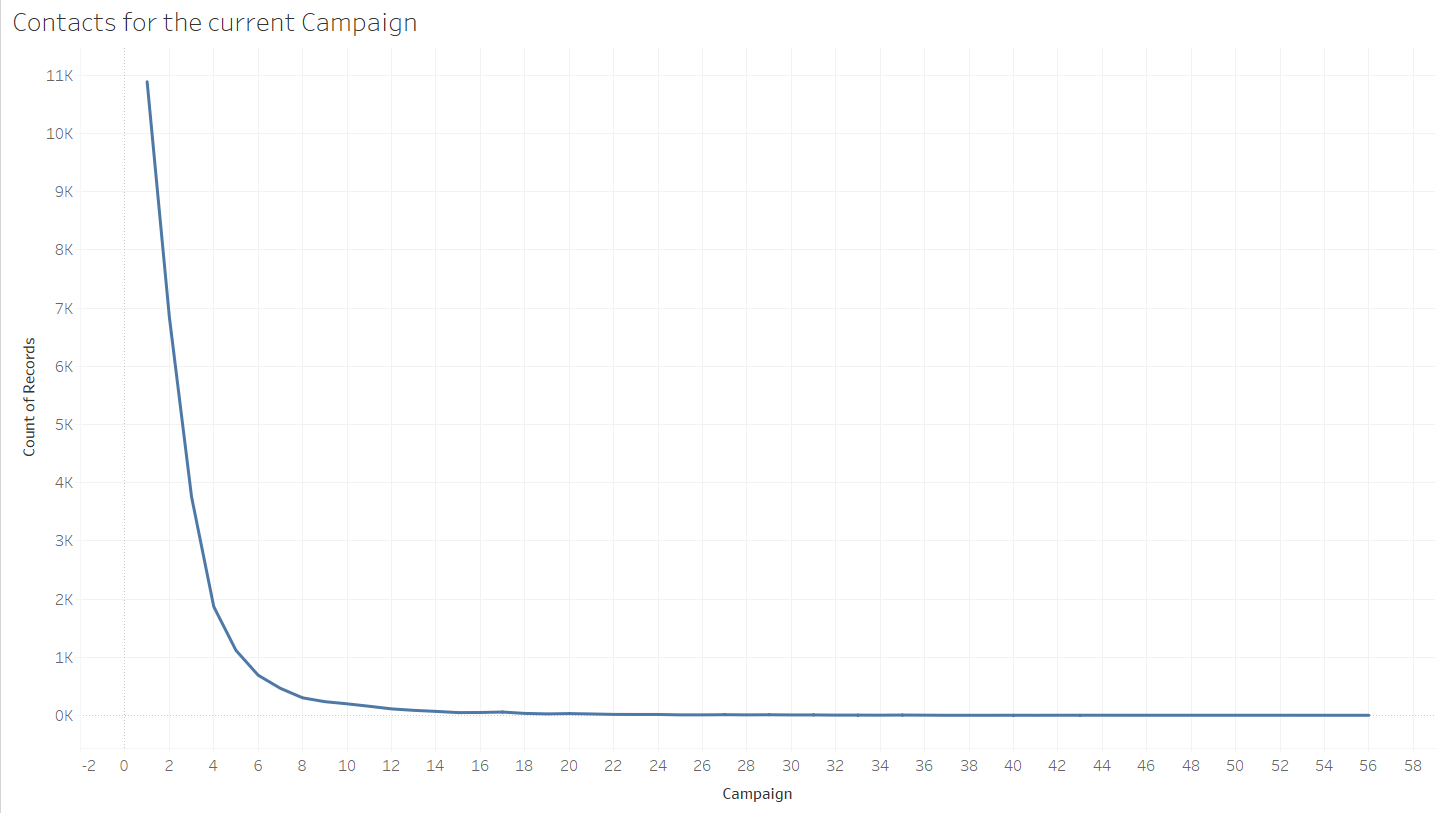

The majority of clients were contacted for upto 3-5 times, with a sharp decline in contacts after that.

Following up too many times could potentially be a bad thing. In my experience it might cause 'ad fatigue' (In this case calls) and having too high of a frequency might be counter productive.

### 12) What does the default distribution look like for our customers?

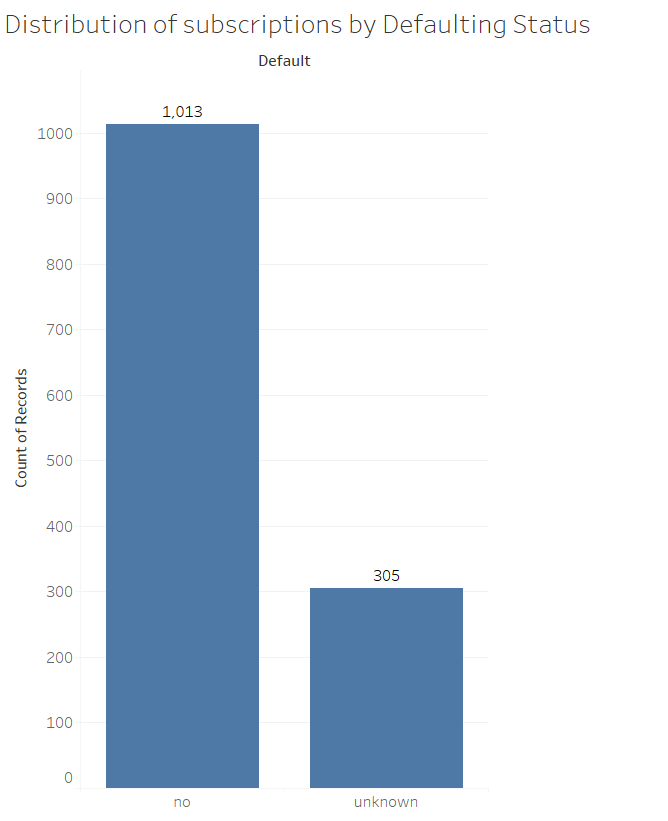

Nobody defaulted for people who subscribed. We could in the future possibly impute unknown values with 'no'. However this could potentially cause a loss of information. (Not being able to collect the feature for example could be an indicator in of itself)

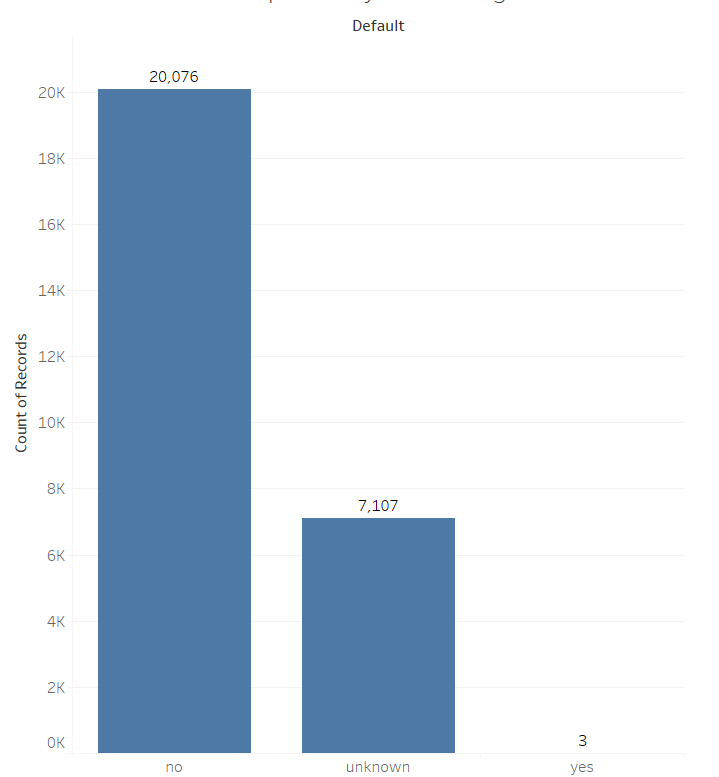

When we look at the distribution for all the calls we see only 3 people had defaulted. This is definitely a minority class and a potential outlier.

### Now that our EDA is done let us dive into the ML aspect to try to figure out significant variables affecting our target variable.

############################################################################################################################

<a id="3-ML"></a>

# 3) A Deeper Dive with Machine Learning

To find causality and significant we can build a machine learning model. Considering this is a binary classification problem let us try to build a logistic regression model.

This model is chosen first because of its interpretibility. We can also try creating more models later on to get one that gives a high accuracy if we do decide to deploy this.

We can also try a decision tree or so to get variable importances that can help make future decisions.

### Steps to Try:


Checking for Outliers - Using Standard Deviation Method

encoding categorial variables

Removing multicollinearity

Standardizing the data

### Additional things to keep in mind that could be relevant:

Feature Engineering

SMOTE (Basically helps tackle class imbalance)

Cross Validation

Alternate Scaling methods.

Backward/Forward Logistic Regression

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27186 entries, 0 to 27185
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              27186 non-null  int32  
 1   job              27186 non-null  object 
 2   marital          27186 non-null  object 
 3   education        27186 non-null  object 
 4   default          27186 non-null  object 
 5   housing          27186 non-null  object 
 6   loan             27186 non-null  object 
 7   contact          27186 non-null  object 
 8   month            27186 non-null  object 
 9   day_of_week      27186 non-null  object 
 10  duration         27186 non-null  int64  
 11  campaign         27186 non-null  int64  
 12  pdays            27186 non-null  int64  
 13  previous         27186 non-null  int64  
 14  poutcome         27186 non-null  object 
 15  emp.var.rate     27186 non-null  float64
 16  cons.price.idx   27186 non-null  float64
 17  cons.conf.id

In [22]:
df[['poutcome']].value_counts()

poutcome   
nonexistent    26560
failure          595
success           31
Name: count, dtype: int64

In [23]:
df_backup  = df.copy()

## A) Checking for Outliers - Using Standard Deviation Method

In [24]:
outliers_dict_std = {}
numeric_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['previous', 'pdays']).columns

# Basically we select the data types that are numerical.
# Over here we don't include previous and pdays because they are minority classes. I saw loss of data when removing outliers for these.

In [25]:
# Over this time we're taking standard deviation. 
# Remember 4 std deviations from the mean should outline any outliers. (Keeping 3 seemed to remove a little too much of the data)

for column in numeric_columns:
    mean = df[column].mean()
    std_dev = df[column].std()
    threshold = 4

    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict_std[column] = outliers

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [26]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27181,40,blue-collar,divorced,basic.9y,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.949273,1
27182,36,entrepreneur,divorced,high.school,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.944940,0
27183,37,blue-collar,married,basic.6y,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.947082,0
27184,32,admin.,single,university.degree,no,yes,yes,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.925211,0


We can see that the number of records have decreased. Removing outliers could prevent overfitting. If we look back at call duration tableau graph for example, we noticed that there were a lot of outliers. 

## B) Encoding Categorical Variables

In [27]:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [28]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)  

# here drop_first=True is a step we are implementing to remove multicollinearity. More on that in section C!

# We also do one hot encoding to isolate individual variables for better understanding. Adding ordinality to some categories might not make sense

df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jun,month_may,month_nov,month_oct,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False


In [29]:
df_encoded.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'ModelPrediction', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_jul', 'month_jun', 'month_may',
       'month_nov', 'month_oct', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='objec

In [30]:
df= df_encoded

In [31]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jun,month_may,month_nov,month_oct,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27181,40,893,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,False,True,False,False,False,False,False,True,False
27182,36,230,3,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,False,True,False,False,False,False,False,True,False
27183,37,68,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,False,True,False,False,False,False,False,True,False
27184,32,74,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,False,True,False,False,False,False,False,True,False


The dimensionality has increased but its not too bad! Models like decision trees/lasso can tackle the 'dimensionality curse' we see so often.

## C) Removing Muticollinearity

If you remember from the heatmap before we noticed there was high correlation between the employment variation rate and the euribor 3 month rate. This is important as this can cause issues in certain models like logistic regression. (The first model we're going to try).

Multicollinarity for tree models arent as significant so potentially we can try running those models on all the features.

To decide which one to remove let us remove the one that has a smaller correlation with the target variable. It's less likely to be important in the model.

In [32]:
correlation_with_target = df[['emp.var.rate', 'euribor3m', 'y']].corr()['y']
print(correlation_with_target)


emp.var.rate   -0.019772
euribor3m      -0.001063
y               1.000000
Name: y, dtype: float64


Based on the above let us remove 'euribor3m'. Also let us remove 'duration' while we're at it because we cannot get that data before the call that the bank has with the customer.

In [33]:
df = df.drop(columns=['euribor3m','duration'])

In [34]:
df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,ModelPrediction,y,...,month_jun,month_may,month_nov,month_oct,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,5191.0,0.932750,0,...,False,True,False,False,True,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,5191.0,0.953579,0,...,False,True,False,False,True,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,5191.0,0.945724,0,...,False,True,False,False,True,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,5191.0,0.933875,0,...,False,True,False,False,True,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,5191.0,0.940996,0,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27181,40,1,999,0,-0.1,93.200,-42.0,5195.8,0.949273,1,...,False,False,True,False,False,False,False,False,True,False
27182,36,3,999,0,-0.1,93.200,-42.0,5195.8,0.944940,0,...,False,False,True,False,False,False,False,False,True,False
27183,37,1,999,0,-0.1,93.200,-42.0,5195.8,0.947082,0,...,False,False,True,False,False,False,False,False,True,False
27184,32,1,999,0,-0.1,93.200,-42.0,5195.8,0.925211,0,...,False,False,True,False,False,False,False,False,True,False


## D) Standardizing the Data

Let us next standardize the data. This is important as if the data is at different scales, this can affect models, causing the optimization times to take longer or even the coefficients to not give an accurate picture.

Another overlooked factor is to split the data into train and test before standardizing. This helps prevent potential data leaks and biases from the train to the test set.

In [35]:
# Here we select the dependend and independent features
X = df.drop(columns=['y'])
y = df['y']

# Train test split as I mentioned.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #42, from the hitchhikers guide to the galaxy!


In [36]:
# Over here we use the same scaler as I mentioned before we do this to prevent data leaks
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# We apply the same scalar object to test to help prevent bias.
X_test_scaled = scaler.transform(X_test)


In [37]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# We build the dataframes for easier analysis as well.

## E) Model Building

Now to build the models! Let us start with building a logistic regression model with statsmodel. This is because it gives us key reports which are useful to interpret the data

First I want to be able to drop correlated variables. This is important because it helps decrease multicollinearity. Basically this helps our model give a good representation.

##### I've worked on similar processes and code before in terms of building a model so I'm reusing some ideas over here.

### a) Removing multicollinearity based on correlation

In [38]:
correlation_matrix = X_train_scaled_df.corr()

# Let us set a threshold for the correlation. Above this threshold it is flagged.
high_correlation_threshold = 0.8 # This can be adjusted
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'].abs() > high_correlation_threshold) & 
                                  (high_corr_pairs['Feature_1'] != high_corr_pairs['Feature_2'])]

# Basically this code identifies and extracts pairs of features from the correlation matrix that have a
#correlation higher than a specified threshold. It also excludes self-correlations.

# Remember it takes the absolute value for comparison.


In [39]:
to_remove = set()
for _, row in high_corr_pairs.iterrows():
    if row['Feature_1'] not in to_remove and row['Feature_2'] not in to_remove:
        to_remove.add(row['Feature_2']) 
        
# Essentially we're removing the feature2 if there is a high correlation.

# Removing the highly correlated features from the dataset we can use list comprehension
selected_features = [feature for feature in X_train_scaled_df.columns if feature not in to_remove]

In [40]:
to_remove

{'loan_unknown',
 'month_may',
 'month_nov',
 'poutcome_nonexistent',
 'poutcome_success'}

These are the variables removed!

In [41]:
selected_features

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'ModelPrediction',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'month_jul',
 'month_jun',
 'month_oct',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed']

In [42]:
X_train_scaled_df = X_train_scaled_df[selected_features]
X_test_scaled_df = X_test_scaled_df[selected_features]

# Now we have the updated dataframes without the multicollinear features based on correlation.

### b) Removing multicollinearity based on VIF factors

In [43]:
# Let us also try to remove the factors that might have high VIF values
# Basically VIF is an indication of multicollinearity.

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# This function calculates that vif and below we set a threshold
vif_threshold = 10

In [44]:
# below we make a copy of the dataframe we made and add a constant. (Needed for statsmodel as a part of its process)

X_train_scaled_reduced = X_train_scaled_df.copy()  
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)
vif_data = calculate_vif(X_train_scaled_const)

# Basically below is a loop that drops the highest VIF (exception of constant) and calculates the VIF after dropping the feature again.

# Essentially we're removing features with high VIF's programatically.
while vif_data['VIF'].max() > vif_threshold:
    # Identifying the feature with the highest VIF
    feature_to_drop = vif_data.loc[vif_data['VIF'] > vif_threshold].sort_values('VIF', ascending=False).iloc[0]['Feature']
    
    # Lets not drop this!
    if feature_to_drop == 'const':
        # If the constant has the highest VIF, ignore it and stop removing further features
        vif_data = vif_data[vif_data['Feature'] != 'const']  # Remove constant from further checks
        continue
    
    # Dropping the feature with the highest VIF and calculating new VIF
    
    X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=[feature_to_drop])
    print(f"Dropping feature '{feature_to_drop}' with VIF: {vif_data.loc[vif_data['Feature'] == feature_to_drop, 'VIF'].values[0]}")
    
    # Recalculate VIF after dropping the feature
    X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)
    vif_data = calculate_vif(X_train_scaled_const)

# Finally, print the remaining VIFs
print("Final VIF values after removing high VIF features:")
print(vif_data)


C:\Users\soham\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\soham\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping feature 'emp.var.rate' with VIF: inf


C:\Users\soham\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\soham\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping feature 'cons.price.idx' with VIF: inf
Dropping feature 'ModelPrediction' with VIF: 46.77279511789106
Dropping feature 'month_jun' with VIF: 11.988855156223734
Final VIF values after removing high VIF features:
                          Feature       VIF
1                             age  1.400405
2                        campaign  1.032589
3                           pdays  1.023820
4                        previous  1.232080
5                   cons.conf.idx  1.974966
6                     nr.employed  1.680005
7                 job_blue-collar  2.499141
8                job_entrepreneur  1.155874
9                   job_housemaid  1.218240
10                 job_management  1.258028
11                    job_retired  1.235599
12              job_self-employed  1.134232
13                   job_services  1.464974
14                    job_student  1.040191
15                 job_technician  1.826638
16                 job_unemployed  1.102197
17                    job_unknow

As you can see it dropped features with high VIF's

Features such as : emp.var.rate and cons.price.idx had very high VIFs

### c) Building a backward logistic regression model.

So what a backward model does is it takes all the features and starts removing the one that aren't significant. It again assesses the overall significance and repeats the process. This in my experience performs wonders.

What we're left with are features that are statistically significant. (It also helps remove overfitting!)

In [45]:
# We need to include the constant term since statsmodels requires it for proper model fitting
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# This is a safety step to ensure the dimensions are consistent
y_train_aligned = y_train.reset_index(drop=True)
X_train_scaled_const_aligned = X_train_scaled_const.reset_index(drop=True)

# Here, we're defining the threshold for p-values (how strict we want to be)
# Features with p-values above 0.05 will be considered for elimination. (Significant!)
p_value_threshold = 0.05

# These features have passed the multicollinearity check, and now we are refining further using backward elimination
selected_features = list(X_train_scaled_reduced.columns)


In [46]:
# Let us perform backward elimination based on p-values
while len(selected_features) > 0:
    # Fit model with the current set of selected features
    X_train_temp = X_train_scaled_const_aligned[['const'] + selected_features]
    logit_model = sm.Logit(y_train_aligned, X_train_temp)
    result = logit_model.fit(disp=False)
    
    # Get p-values (excluding the constant)
    p_values = result.pvalues.drop('const', errors='ignore')
    
    # Find the feature with the highest p-value
    worst_pval_feature = p_values.idxmax()
    
    # If the p-value is above the threshold, remove the feature
    if p_values[worst_pval_feature] > p_value_threshold:
        print(f"Removing feature: {worst_pval_feature}, p-value: {p_values[worst_pval_feature]}")
        selected_features.remove(worst_pval_feature)
    else:
        # Stop if no p-values exceed the threshold
        break


C:\Users\soham\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Removing feature: education_illiterate, p-value: 0.9970257380144746


C:\Users\soham\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Removing feature: default_yes, p-value: 0.9956288110325675
Removing feature: job_self-employed, p-value: 0.9821721090084498
Removing feature: housing_yes, p-value: 0.9264334864595785
Removing feature: campaign, p-value: 0.9204798534305835
Removing feature: education_unknown, p-value: 0.886296233254684
Removing feature: job_technician, p-value: 0.8580930500572914
Removing feature: loan_yes, p-value: 0.8256723675184676
Removing feature: default_unknown, p-value: 0.8148919472902065
Removing feature: job_unknown, p-value: 0.8111337172599954
Removing feature: day_of_week_wed, p-value: 0.8116627989429582
Removing feature: marital_married, p-value: 0.7715628504556655
Removing feature: job_student, p-value: 0.7365934697391634
Removing feature: job_services, p-value: 0.7434992253819754
Removing feature: education_basic.6y, p-value: 0.5656788904736607
Removing feature: education_professional.course, p-value: 0.6525099191757626
Removing feature: education_high.school, p-value: 0.516547631288812
R

In [47]:
# Let us fit the final logistic regression model with remaining features
X_train_final = X_train_scaled_const_aligned[['const'] + selected_features]
final_logit_model = sm.Logit(y_train_aligned, X_train_final)
final_result = final_logit_model.fit(maxiter=1000)

# Now let us see the final summary!
print(final_result.summary())


Optimization terminated successfully.
         Current function value: 0.174656
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                18593
Model:                          Logit   Df Residuals:                    18583
Method:                           MLE   Df Model:                            9
Date:                Thu, 12 Sep 2024   Pseudo R-squ.:                 0.03116
Time:                        08:51:00   Log-Likelihood:                -3247.4
converged:                       True   LL-Null:                       -3351.8
Covariance Type:            nonrobust   LLR p-value:                 4.551e-40
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0067      0.799     -1.260      0.208      -2.573       0.560
age     

In [48]:
# Using the selected features (from backward elimination) to prepare the test set
X_test_scaled_const = sm.add_constant(X_test_scaled_df[selected_features])

# Step 1: Making predictions on the test set using the final fitted model
y_test_pred_prob = final_result.predict(X_test_scaled_const)
y_test_pred_class = (y_test_pred_prob >= 0.5).astype(int)

# Step 2: Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_class)
print("Confusion Matrix:")
print(conf_matrix)

# Step 3: Printing the classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_test_pred_class))


Confusion Matrix:
[[7630    4]
 [ 325   10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7634
           1       0.71      0.03      0.06       335

    accuracy                           0.96      7969
   macro avg       0.84      0.51      0.52      7969
weighted avg       0.95      0.96      0.94      7969



Pseudo R-squared in logistic regression measures how well the model fits the data, comparing the likelihood of the fitted model to a null model.

Pseudo R Square is low (0.03116): This suggests that the model explains only about 3.12% of the variance in the dependent variable (y) (Confusion matrix reflects this.). While this may seem low, it can explain a part of our target variable behaviour.

The significant features identified still provide valuable insights into the factors influencing the target variable, helping us understand relationships and making informed decisions, especially in complex datasets where complete variance explanation is unlikely.

For additional resources on the same: https://www.healthcare-economist.com/2016/12/28/what-is-a-pseudo-r-squared/

##### Note:  I have also tried additional models (In case the model is explainable otherwise) and so no significant results. 

It can be assumed that there are other important variables/complexities/or even more data that we could need. 

###########################################################################################################################

<a id="4-KF"></a>

# 4) Key Findings: 

#### 1) Age:

The coefficient for age is -0.5560, meaning that as age increases, the likelihood of subscription decreases.
Older individuals might be less likely to subscribe, so focusing efforts on younger age groups could potentially improve outcomes.

This was supported by our initial analysis on age for the subscriptions as seen in the image below. The number of people subscribing decreases as they get older.

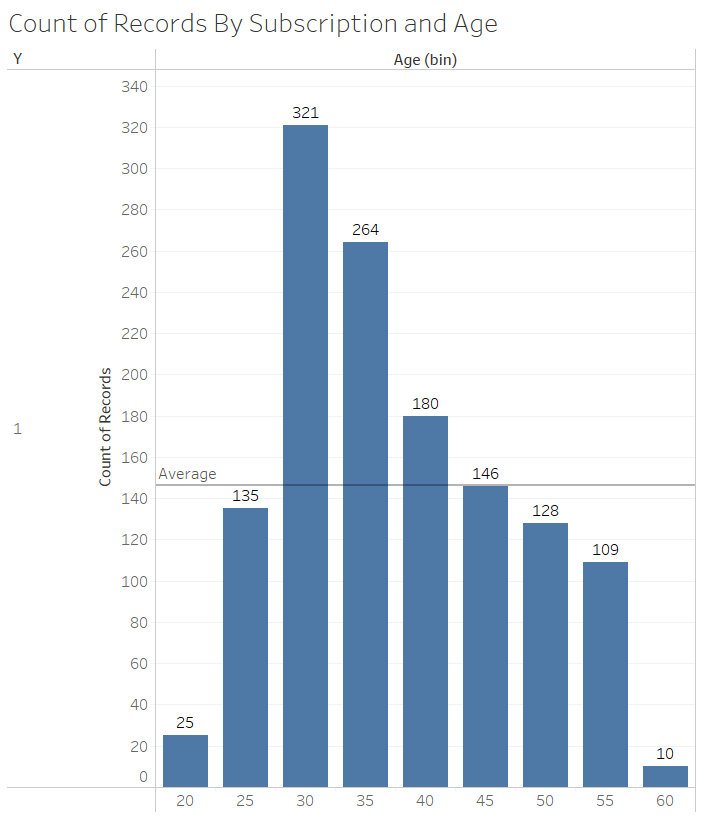


#### 2) Pdays:

The coefficient is -1.8054, indicating that if the person has not been contacted before, the less likely someone is to subscribe.


#### 3) Nr.employed:

A positive coefficient of 0.2666 suggests that as the number of employed individuals rises, the likelihood of subscriptions also increases.

This could indicate that during times of higher employment, people feel more financially secure and are more open to subscribing.

Check out Post Analysis 1 in Tableau

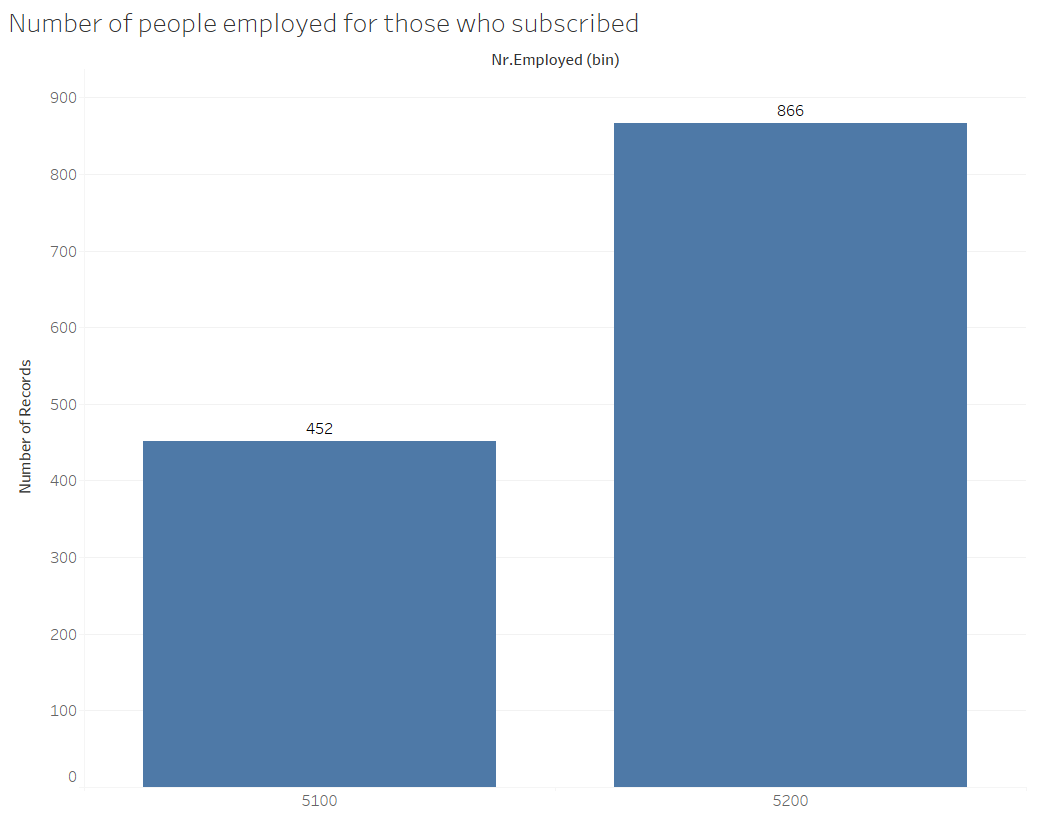

#### 4) Job_management and 5) Job_retired

The positive coefficient of 0.3394 shows that individuals in management roles are more likely to subscribe compared to other professions. Targeting management professionals could yield better results in future campaigns.

The coefficient for retired individuals is 0.5009, meaning that retirees are also more likely to subscribe compared to other groups. This suggests retirees might have more time and resources available, making them a good demographic to target.

Remember we noticed them in the middle area during looking at the distribution by job title. Remember the model results tell us when all things are kept constant how do these factors affect the dependend variable. The EDA tells us more of what we notice rather than association as such.



#### 6) Contact_telephone:

The negative coefficient of -0.3675 means that telephone contact is less effective for driving subscriptions.
Cellular contact seems to be more efficient, so campaigns relying more on cellular communication could potentially increase success rates.

We see this in the image as well. More number of subscriptions happen through cellular.

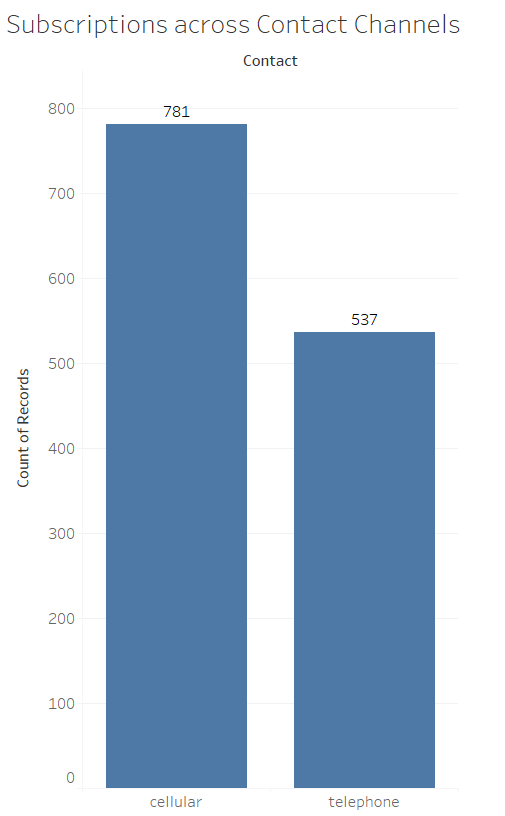

#### 7) Month_oct:

The large positive coefficient of 4.0328 indicates that contacting clients in October is highly effective for securing subscriptions.

It could be beneficial to focus marketing efforts during this month as it appears to drive significantly more subscriptions than other months.

Our Visualization also shows us a trend we could have missed out. Note the number of people subscribing in october vs the total number of people. A high ratio! 

Who subscribed:

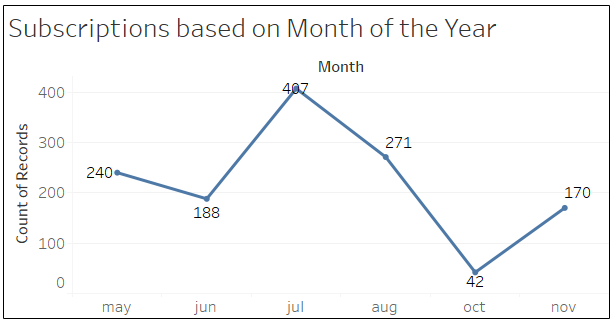

Total Records:



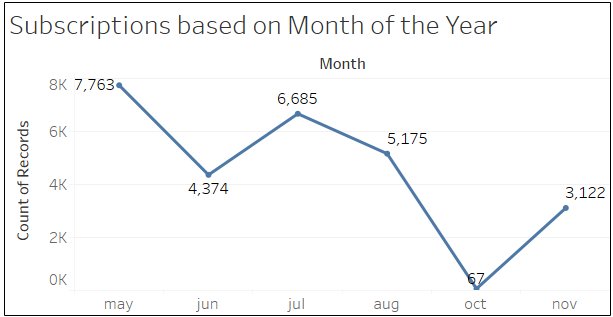

#### 8) Day_of_week_mon and 9) Day_of_week_tue:

The negative coefficient of -0.1927 suggests that contacting clients on Monday leads to fewer subscriptions.
Perhaps clients are less responsive at the start of the week, so considering different days for outreach could improve subscription rates.

Similarly, the coefficient for Tuesday is -0.2111, which indicates fewer subscriptions compared to other days.
This again suggests that midweek might be a better time to reach out to clients, compared to the beginning of the week.

We see these in our visualizations as well.

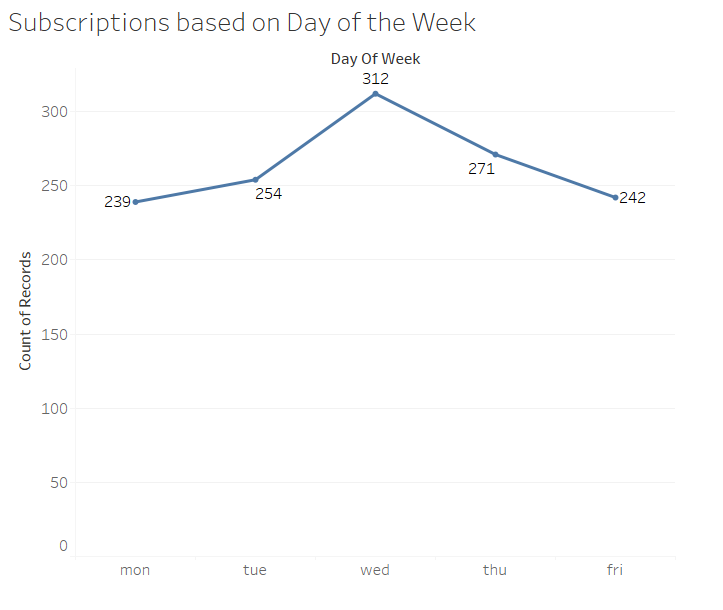

#### Note about the Dashboards within Tableau

Based on these important features I have created 3 interactive dashboards within tableau. 

These dashboard set aims to give a comprehensive view of what the ML model tells us matters to the business.

###########################################################################################################################

#### Disclaimer: 

For example there is a strong negative association between using telephone contact and the likelihood of securing a subscription. Based on the model, using telephone contact is correlated with a lower probability of successful subscriptions, but this does not imply that using telephone causes fewer subscriptions (lower R^2). There may be other factors influencing the outcome that we haven't accounted for.

The relationship highlights that telephone contact is less effective, and cellphone is better but other factors could also be influencing this outcome.

Switching to telephone contact is strongly associated with a decrease in subscriptions, as evidenced by the low p-value. However, we must be cautious in interpreting this relationship as causal, particularly given the model's low R², which suggests there may be other factors influencing the outcome that we haven't accounted for.



###########################################################################################################################

<a id="5-AR"></a>

# 5) Actionable Recommendations

#### 1) Target Young Adult Clients (30-45 Years Old):

Since the likelihood of subscription decreases as age increases, focus marketing efforts on younger age groups who are more likely to subscribe. This is if our market reach is not already exhausted for this segment.

As we noticed in our initial EDA as well, a large amount of subscriptions happen from 30-45 years old. This could involve creating tailored messages for example the importance of investing early on.


#### 2) Prioritize Contacting Individuals with who have been contacted before.: 

Since those who haven’t been contacted before are less likely to subscribe, consider implementing follow-up strategies for first-time contacts to increase engagement and build trust. 

This can involve optimizing our marketing/sales funnel to reach existing customers.


#### 3) Leverage High Employment Periods (Based on market conditions): 

Given that higher employment rates correlate with higher subscription likelihood, ramp up marketing efforts during times of economic stability, as people may feel more secure and willing to invest in a term deposit.


#### 4) Focus on Management Professionals and Retirees: 

Since individuals in management and retirees have higher subscription likelihoods, these demographics should be key targets. Tailored campaigns addressing their financial goals or security in retirement could drive better results.

Although our current dataset shows less of them, we can look at targeting that demographic even more.


#### 5) Shift Away from Telephone Contact: 

Telephone contact is less effective than cellular. This might possibly be because people are more likely to respond to a device they have on them at all times.

Shifting more resources toward mobile-based outreach can improve subscription rates, as seen with the positive results from cellular campaigns.

In addition to this we can look into how to increase the duration of the calls as we know this is a strong factor. This can come in the form of upskilling the sale staff or even innovating ways to understand customer sentiment during the call to create tailored responses. (For example Rocket Logic AI).


#### 6) Maximize October Outreach: 

Although the total number subscriptions are less, October shows good potential based on the model (The ratio of subscribed/non subscribed). Consider concentrating major marketing efforts during this month, with special offers or targeted promotions.

There was a dip in total people contacted so we can dive into the root cause of that too.


#### 7)  Avoid Early Week Contact:

Monday and Tuesday are less effective days for outreach. Consider focusing on midweek or later in the week to maximize responsiveness and improve subscription outcomes.

##########################################################################################################################

<a id="6-PPT"></a>

# 6) Presentation

#### I should have the presentation ready by the time of the interview as discussed with Kayla! Thank you for this exercise and for taking the time to review it!

#### If you do have any issues with loading the above do let me know.

##########################################################################################################################

<a id="7-Appendix"></a>

## 7) APPENDIX

### Appendix 1) Let us also try building other models to see if it is explainable otherwise

In [49]:
# 1. Linear SVM (LinearSVC)
lin_svc = LinearSVC(random_state=42, max_iter=10000)
lin_svc.fit(X_train_scaled_df, y_train)

# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled_df, y_train)

# 3. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled_df, y_train)

# 4. Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train_scaled_df, y_train)

# 5. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled_df, y_train)

# 6. Random Forest Classifier
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train_scaled_df, y_train)

# Evaluating the models
def evaluate_model(model, model_name):
    print(f"\nEvaluating {model_name}...")
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_scaled_df)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    print(f"\nConfusion Matrix for {model_name}:")
    print(conf_matrix)
    
    # Classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_test_pred))

# Evaluate Linear SVM
evaluate_model(lin_svc, "Linear SVM")

# Evaluate XGBoost
evaluate_model(xgb_model, "XGBoost Classifier")

# Evaluate KNN
evaluate_model(knn_model, "K-Nearest Neighbors")

# Evaluate Gradient Boosting
evaluate_model(gbc_model, "Gradient Boosting Classifier")

# Evaluate Decision Tree Classifier
evaluate_model(dt_model, "Decision Tree Classifier")

# Evaluate Random Forest Classifier
evaluate_model(rfc_model, "Random Forest Classifier")


C:\Users\soham\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Evaluating Linear SVM...

Confusion Matrix for Linear SVM:
[[7630    4]
 [ 325   10]]

Classification Report for Linear SVM:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7634
           1       0.71      0.03      0.06       335

    accuracy                           0.96      7969
   macro avg       0.84      0.51      0.52      7969
weighted avg       0.95      0.96      0.94      7969


Evaluating XGBoost Classifier...

Confusion Matrix for XGBoost Classifier:
[[7626    8]
 [ 329    6]]

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7634
           1       0.43      0.02      0.03       335

    accuracy                           0.96      7969
   macro avg       0.69      0.51      0.51      7969
weighted avg       0.94      0.96      0.94      7969


Evaluating K-Nearest Neighbors...

Confusion Matrix for K-Nearest Nei

As we can see here, the confusion matrices tell us that these models too are underperforming despite trying different models.

### Appendix 2) Other things Tried

Additionally I had tried:

1) SMOTE: Did not increase the performance (Precision or Recall).

2) Different Scaling Methods: No much Improvement.

3) Fitting Neural Nets and Decision trees with all features (Multicollinearity doesnt matter much here): Not much improvement.

4) Stepwise and forward regression: Not much improvement.

5) Tried feature engineering. Would need more business domain context from the Portuguese bank to make reasonable features.

# END